Nama : Leonardus Febrian Ananda Darminto; 
Nim  : A11.2019.11974;
Kelompok : A11.4611

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
dataset = pd.read_csv("Data Social Network.csv")
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [8]:
print(x)

[[    19  20000]
 [    35  24000]
 [    26  44000]
 [    27  55000]
 [    19  77000]
 [    27  58000]
 [    27  86000]
 [    32 120000]
 [    25  40000]
 [    35  56000]
 [    26  78000]
 [    26  60000]
 [    20  89000]]


In [9]:
print(y)

[0 0 1 0 0 0 0 0 1 0 0 0 1]


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [11]:
print(x_train)

[[    26  44000]
 [    25  40000]
 [    35  24000]
 [    32 120000]
 [    35  56000]
 [    27  55000]
 [    19  20000]
 [    27  58000]
 [    20  89000]]


In [12]:
print(x_test)

[[   27 86000]
 [   26 60000]
 [   19 77000]
 [   26 78000]]


In [13]:
print(y_train)

[1 1 0 0 0 0 0 0 1]


In [14]:
print(y_test)

[0 0 0 0]


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
print(x_train)

[[-0.24343225 -0.41228296]
 [-0.42600643 -0.54721193]
 [ 1.39973542 -1.08692782]
 [ 0.85201287  2.15136747]
 [ 1.39973542 -0.00749605]
 [-0.06085806 -0.0412283 ]
 [-1.52145155 -1.22185679]
 [-0.06085806  0.05996843]
 [-1.33887736  1.10566795]]


In [17]:
print(x_test)

[[-0.06085806  1.00447122]
 [-0.24343225  0.12743292]
 [-1.52145155  0.70088104]
 [-0.24343225  0.73461328]]


In [18]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [19]:
y_pred = classifier.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 3]
 [0 0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


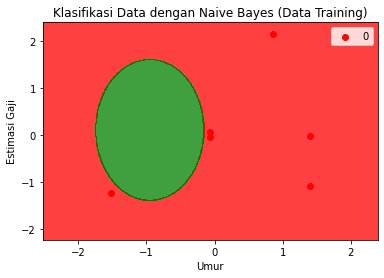

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


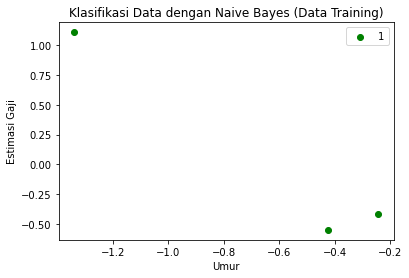

In [21]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red','green',))(i), label = j)
  plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
  plt.xlabel('Umur')
  plt.ylabel('Estimasi Gaji')
  plt.legend()
  plt.show()